# Effect of Loan Features on Loan Amount
## by Anthony Mulweye

## Investigation Overview


In this investigation, I'm interested in examining what determines the maximum Loan Amount to be given out to a Borrower. The main focus was StatedMonthlyIncome, DebtToIncomeRatio, LoanTerm and ProsperScore.


## Dataset Overview

The data consisted of Loan Original Amount and other features of approximately 114,000 rows of loan data. A subset of the data was sliced from the main data. The features included StatedMonthlyIncome, DebtToIncome Ratio, LoanTerm, ProspeScore and additional features. Some data points were removed due to missing information and inconsistencies, others were filled in and others were converted to different data types to accommodate the analysis.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [5]:
# load in the dataset into a pandas dataframe
loan_clean = pd.read_csv('cleanLoanData.csv')

In [6]:
# Convert LoanStatus, ProsperRating (Alpha), ProsperScore into ordered categorical types
ordinal_var_dict = {'LoanStatus': ['Cancelled',  'Chargedoff', 'Completed', 'Current', 'Defaulted', 'FinalPaymentInProgress'
                                   ,'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)',
                                   'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)'],
                    'ProsperRating (Alpha)': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                    'ProsperScore': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                   'LoanOriginationMonth': ['January','Febuary', 'March','April','May','June','July','August','September',
                                            'October','November','December'],
                   'LoanOriginationYear' : [2009, 2010, 2011, 2012, 2013, 2014],
                   'IncomeRange' : ['Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999',
                                   '$75,000-99,999','$100,000+']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    loan_clean[var] = loan_clean[var].astype(ordered_var)

In [7]:
# Using IQR method to detect outliers
Q1 = loan_clean['StatedMonthlyIncome'].quantile(0.25)
Q3 = loan_clean['StatedMonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1
LowerLimit = Q1 - 1.5*IQR  #Data which falls below this is an outlier
UpperLimit = Q3 + 1.5*IQR  #Data which falls above this is an outlier
print(LowerLimit, UpperLimit)

-1918.0 12618.0


In [8]:
# Transformation to remove outliers
# Trimming
df_clean = df_clean[df_clean['StatedMonthlyIncome'] < UpperLimit]

## Distribution of Loan Amount

Loan Amounts in the dataset are given out in rounded figures and in multiples of 5,000 dollars. Investigating on a smaller bin size, the distribution is Multimodal with majority of loan amount given out at 4,000 , 10,000 and 15,0000 dollars.

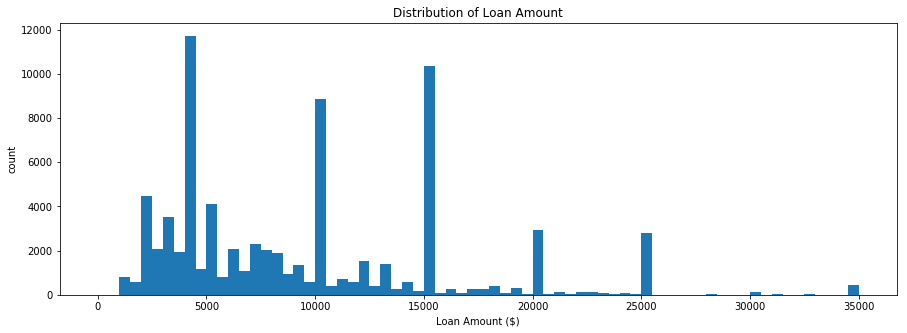

In [9]:
binsize = 500
bins = np.arange(0, loan_clean['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[15, 5])
plt.hist(data = loan_clean, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Loan Amount ($)')
plt.ylabel('count')
plt.title('Distribution of Loan Amount');
plt.show()

## Distribution of Monthly Loan Payment

The distribution is unimodal with a large number of borrowers making a monthly payment at approximately 200 dollars. Majority of the monthly loan payment is below 500 dollars.

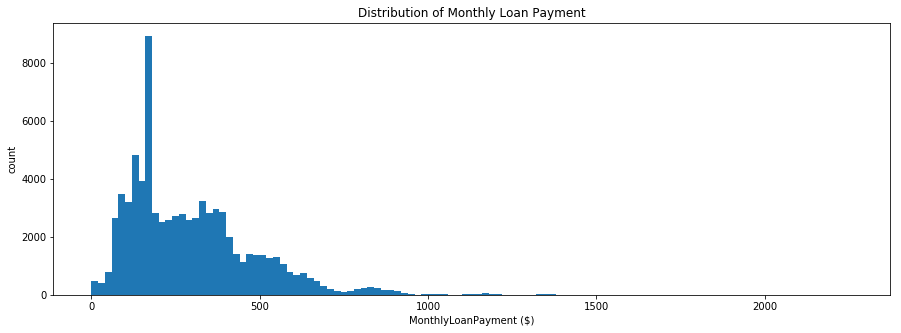

In [10]:
binsize = 20
bins = np.arange(0, loan_clean['MonthlyLoanPayment'].max()+binsize, binsize)

plt.figure(figsize=[15, 5])
plt.hist(data = loan_clean, x = 'MonthlyLoanPayment', bins = bins);
plt.xlabel('MonthlyLoanPayment ($)');
plt.ylabel('count');
plt.title('Distribution of Monthly Loan Payment');
plt.show()

## Loan Amount by Stated Monthly Income

My assumption is that the higher the Monthly Income the higher the Loan Amount. This assumption is proven to be true from the following plot. When a borrower has relatively low Monthly Income (<8,000) the probabilities of getting Low and High Loan Amount are similar. However, when the borrower’s Monthly Income is high (>8,000), he/she is more likely to get a Large Loan Amount

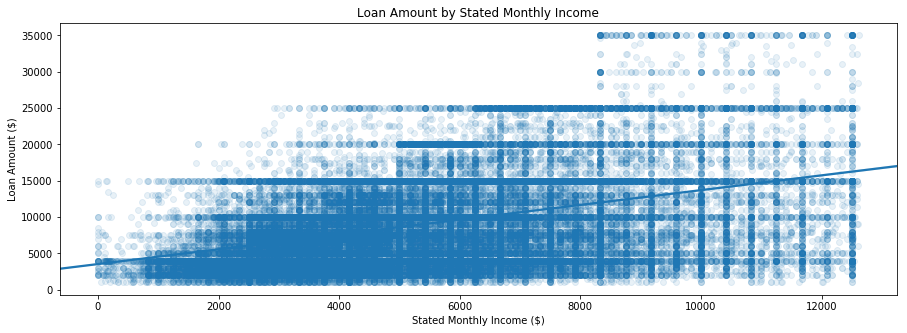

In [14]:
plt.figure(figsize=[15,5]);
sb.regplot(data=df_clean, x='StatedMonthlyIncome', y='LoanOriginalAmount', x_jitter=0.3, scatter_kws=({'alpha':1/10}));
plt.title('Loan Amount by Stated Monthly Income');
plt.xlabel('Stated Monthly Income ($)');
plt.ylabel('Loan Amount ($)');

## Loan Amount by Monthly Loan Payment

There is a strong positive relationship between Loan Amount and Monthly Loan Payment. This is likely because, monthly Loan payment is decided or calculated using the Loan amount.
I see that the plot seems to be split into three lines, because of the effect of a categorical variable.

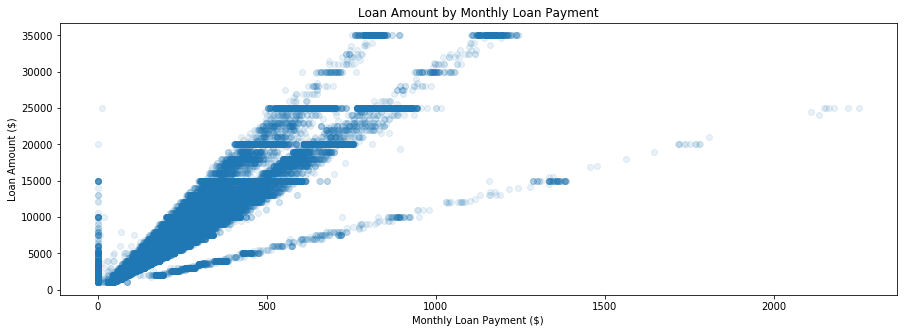

In [15]:
plt.figure(figsize=[15, 5])
sb.regplot(data=loan_clean, x='MonthlyLoanPayment', y='LoanOriginalAmount',
           fit_reg=False, x_jitter=0.3, scatter_kws=({'alpha':1/10}));
plt.xlabel('Monthly Loan Payment ($)')
plt.ylabel('Loan Amount ($)')
plt.title('Loan Amount by Monthly Loan Payment');

## Loan Amount Across Loan Term and Monthly Loan Payment

We can see how the variable, Loan Term affects the correlation. Borrowers with longer Loan Term 36, 60 months receives higher Loan amount.
For a maximum Loan Amount of 35,000 the Loan Term is longer,(36 or 60 months)

Also, For longer Loan Terms the scheduled monthly payment is less than that of small term (12months).

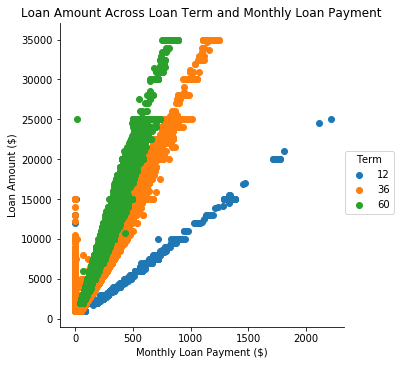

In [16]:
g = sb.FacetGrid(data = df_clean, hue = 'Term', size = 5);
g.map(plt.scatter, 'MonthlyLoanPayment', 'LoanOriginalAmount');
plt.title('Loan Amount Across Loan Term and Monthly Loan Payment')
plt.xlabel('Monthly Loan Payment ($)');
plt.ylabel('Loan Amount ($)')
g.add_legend();

## Average Loan Amount given out by Prosper Risk Score

The Loan Amount increases as the Prosper risk reduces. This shows that low risk borrowers have a higher chance of getting larger Loan Amounts.

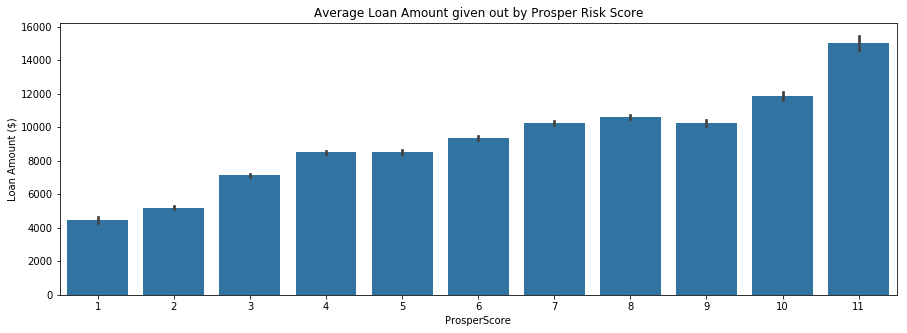

In [17]:
plt.figure(figsize=[15,5])
base_color = sb.color_palette()[0]
sb.barplot(data=loan_clean, x='ProsperScore', y='LoanOriginalAmount', color=base_color)
plt.ylabel('Loan Amount ($)');
plt.title('Average Loan Amount given out by Prosper Risk Score');

## Loan Amount Across Loan Term and Prosper Score
For a larger loan term and a high Prosper Score, the Borrower is more likely to get a large Loan Amount.

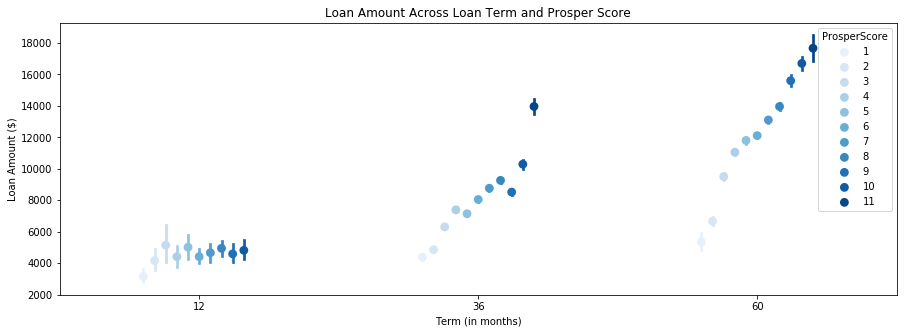

In [18]:
fig = plt.figure(figsize = [15,5])
ax = sb.pointplot(data = loan_clean, x = 'Term', y = 'LoanOriginalAmount', hue = 'ProsperScore',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Loan Amount Across Loan Term and Prosper Score')
plt.ylabel('Loan Amount ($)')
plt.xlabel('Term (in months)')
plt.show();

## Loan Amount Across Prosper Score and Home Ownership

Home-owners with a good Prosper score are likely to get a Large Loan Amount.

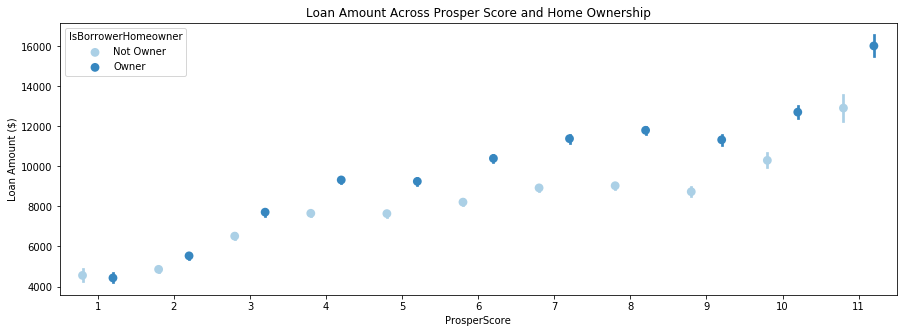

In [19]:
fig = plt.figure(figsize = [15,5])
ax = sb.pointplot(data = loan_clean, x = 'ProsperScore', y = 'LoanOriginalAmount', hue = 'IsBorrowerHomeowner',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Loan Amount Across Prosper Score and Home Ownership')
plt.ylabel('Loan Amount ($)')
plt.xlabel('ProsperScore')
plt.show();

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 765282 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/